In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
URLs.MNIST_TINY

'http://files.fast.ai/data/examples/mnist_tiny'

In [4]:
doc(untar_data)

In [5]:
path = untar_data(URLs.MNIST_TINY)

In [6]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_tiny/models'),
 PosixPath('/home/jupyter/.fastai/data/mnist_tiny/valid'),
 PosixPath('/home/jupyter/.fastai/data/mnist_tiny/test'),
 PosixPath('/home/jupyter/.fastai/data/mnist_tiny/labels.csv'),
 PosixPath('/home/jupyter/.fastai/data/mnist_tiny/train')]

In [75]:
(path/'test').ls()

FileNotFoundError: [Errno 2] No such file or directory: '/home/jupyter/.fastai/data/mnist_png/test'

In [7]:
doc(ImageDataBunch)

In [10]:
data = ImageDataBunch.from_folder(path)

In [11]:
data

ImageDataBunch;

Train: LabelList (709 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
7,7,7,7,7
Path: /home/jupyter/.fastai/data/mnist_tiny;

Valid: LabelList (699 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
7,7,7,7,7
Path: /home/jupyter/.fastai/data/mnist_tiny;

Test: None

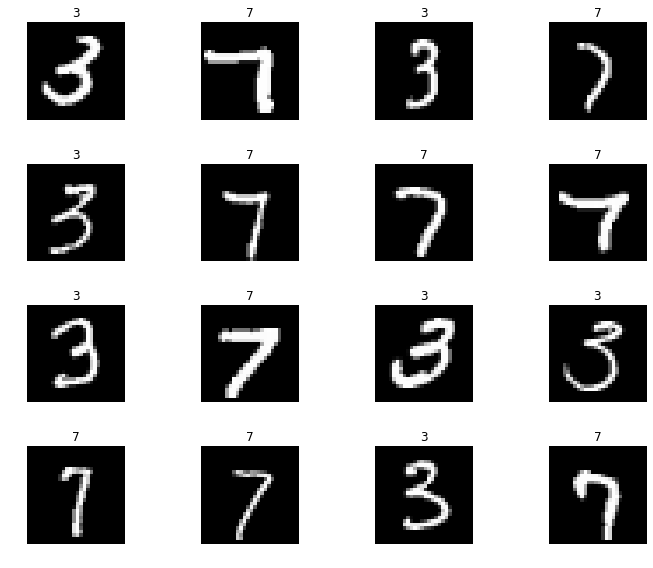

In [25]:
data.show_batch(4, figsize=(10,8))

In [26]:
data.classes

['3', '7']

In [13]:
model = simple_cnn((3,16,16,2))

In [14]:
learn = Learner(data, model)

In [27]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace)
  )
  (1): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace)
  )
  (2): Sequential(
    (0): Conv2d(16, 2, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace)
  )
  (3): Sequential(
    (0): AdaptiveAvgPool2d(output_size=1)
    (1): Flatten()
  )
)

In [15]:
learn.fit(1)

epoch,train_loss,valid_loss,time
1,0.629513,0.496014,00:01


In [17]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,time
1,0.304429,0.193595,00:00


In [28]:
learn.save('stage-1')

In [29]:
interp = ClassificationInterpretation.from_learner(learn)

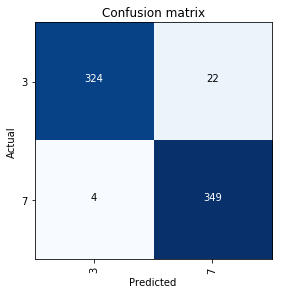

In [32]:
interp.plot_confusion_matrix()

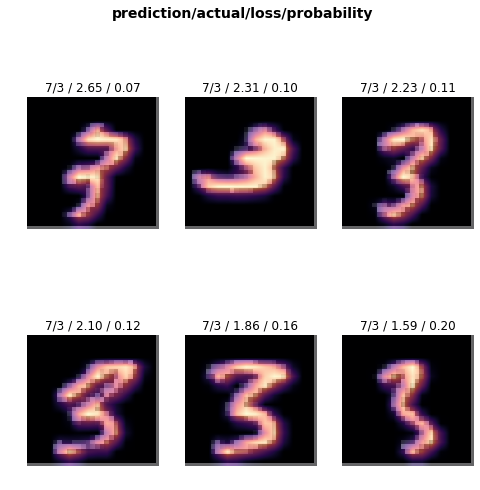

In [35]:
interp.plot_top_losses(6, figsize=(8,8))

In [36]:
interp.most_confused()

[('3', '7', 22), ('7', '3', 4)]

In [43]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,time
1,0.199584,0.145783,00:00
2,0.199614,0.142896,00:00
3,0.197140,0.135029,00:00
4,0.191742,0.128018,00:00
5,0.188669,0.123834,00:00
6,0.185198,0.123778,00:00
7,0.181677,0.122932,00:00
8,0.179228,0.122590,00:00


In [44]:
interp = ClassificationInterpretation.from_learner(learn)

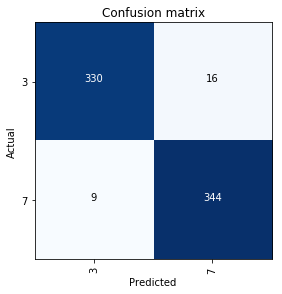

In [45]:
interp.plot_confusion_matrix()

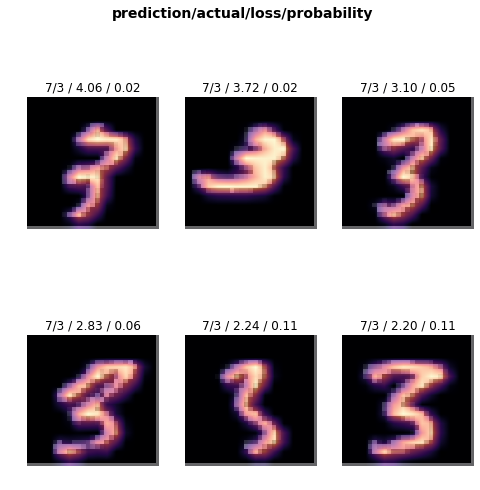

In [46]:
interp.plot_top_losses(6, figsize=(8,8))

In [50]:
learn_resnet = create_cnn(data, models.resnet18, metrics=accuracy)

In [52]:
learn_resnet.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
1,0.575489,0.416265,0.859800,00:01


In [53]:
learn_resnet.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
1,0.303810,0.388209,0.849785,00:00
2,0.257928,0.365833,0.836910,00:00
3,0.221575,0.386018,0.834049,00:00
4,0.191146,0.395462,0.844063,00:00
5,0.166144,0.365742,0.848355,00:00


In [55]:
learn_resnet.fit(1)

epoch,train_loss,valid_loss,accuracy,time
1,0.104090,0.335892,0.871245,00:00


In [56]:
learn_resnet.fit(2)

epoch,train_loss,valid_loss,accuracy,time
1,0.085865,0.239514,0.911302,00:00
2,0.083757,0.210775,0.919886,00:00


In [57]:
learn_resnet.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


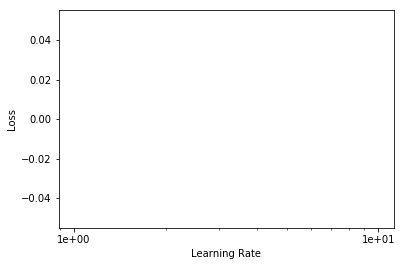

In [58]:
learn_resnet.recorder.plot()

In [59]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


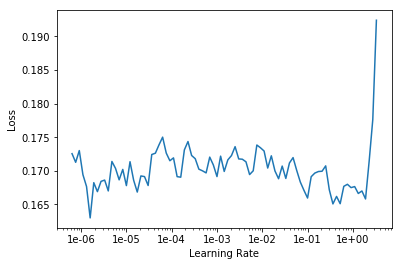

In [60]:
learn.recorder.plot()

In [61]:
learn.metrics.append(accuracy)

In [62]:
learn.fit_one_cycle(1, max_lr=1e-1)

epoch,train_loss,valid_loss,accuracy,time
1,0.663924,0.305924,0.865522,00:00


In [63]:
learn.fit_one_cycle(5, max_lr=1e-1)

epoch,train_loss,valid_loss,accuracy,time
1,0.295383,0.255741,0.918455,00:00
2,0.276498,0.130751,0.949928,00:00
3,0.243304,0.114992,0.947067,00:00
4,0.226058,0.121672,0.941345,00:00
5,0.209934,0.110222,0.952790,00:00


In [65]:
learn.fit_one_cycle(10, max_lr=5e-2)

epoch,train_loss,valid_loss,accuracy,time
1,0.164712,0.103943,0.951359,00:00
2,0.164802,0.099511,0.955651,00:00
3,0.161048,0.094266,0.959943,00:00
4,0.158696,0.083039,0.972818,00:00
5,0.150581,0.069606,0.978541,00:00
6,0.140550,0.066647,0.977110,00:00
7,0.131362,0.063297,0.977110,00:00
8,0.122941,0.059804,0.978541,00:00
9,0.116120,0.056839,0.978541,00:00
10,0.110646,0.056804,0.978541,00:00


In [66]:
interp = ClassificationInterpretation.from_learner(learn)

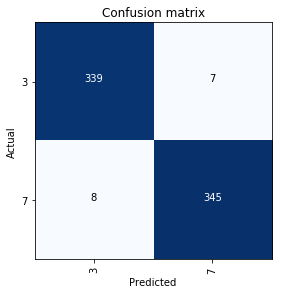

In [67]:
interp.plot_confusion_matrix()

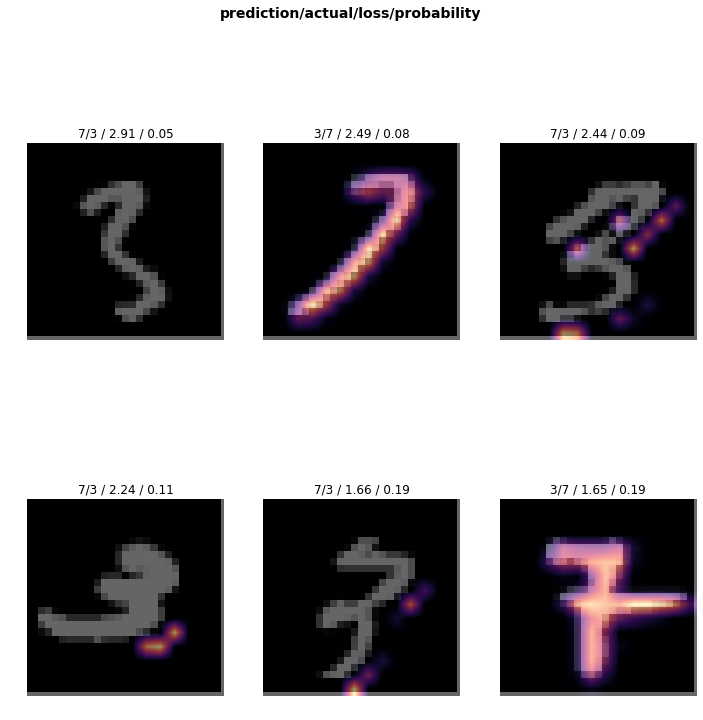

In [69]:
interp.plot_top_losses(6)

## Full MNIST

In [70]:
path = untar_data(URLs.MNIST)

In [71]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_png/training'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing')]

In [73]:
(path/'training').ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_png/training/9'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/7'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/2'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/6'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/1'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/4'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/5'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/0'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/8'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/3')]

In [76]:
data = ImageDataBunch.from_folder(path, train='training', valid='testing')

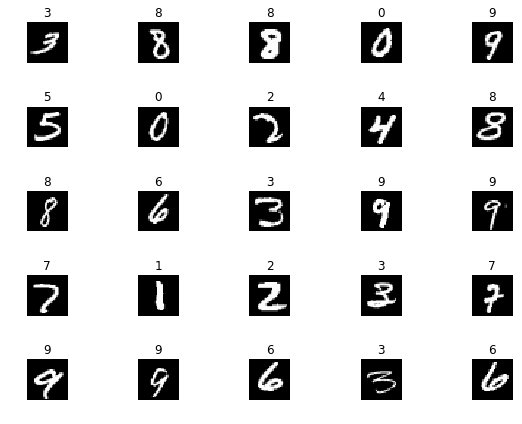

In [78]:
data.show_batch(5, figsize=(8,6))

In [80]:
model = simple_cnn((3, 16, 16, 10))

In [82]:
learn = Learner(data, model, metrics=accuracy)

In [83]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


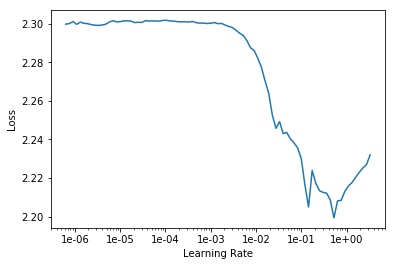

In [84]:
learn.recorder.plot()

In [85]:
learn.fit_one_cycle(1, max_lr=(1e-1))

epoch,train_loss,valid_loss,accuracy,time
1,0.183246,0.176025,0.947500,00:05


In [86]:
learn.fit_one_cycle(5, max_lr=(1e-1))

epoch,train_loss,valid_loss,accuracy,time
1,0.318228,0.277523,0.917000,00:05
2,0.320185,0.303979,0.911600,00:05
3,0.234934,0.238217,0.927500,00:05
4,0.148584,0.129038,0.960600,00:05
5,0.094047,0.100000,0.968400,00:05


In [92]:
learn.fit_one_cycle(2, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
1,0.106890,0.106058,0.967800,00:05
2,0.088873,0.097020,0.970300,00:05


In [93]:
learn.fit_one_cycle(3, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
1,0.098804,0.107466,0.968000,00:05
2,0.102527,0.102262,0.967700,00:05
3,0.081182,0.094440,0.970100,00:05


### Resnet 18

In [94]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)

In [95]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


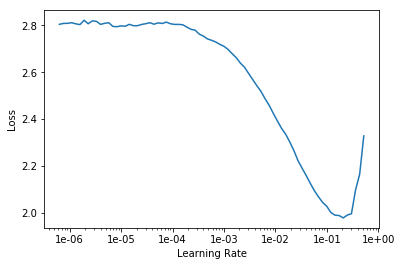

In [96]:
learn.recorder.plot()

In [97]:
learn.fit_one_cycle(1, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
1,0.074840,0.042908,0.985400,00:20


In [98]:
learn.fit_one_cycle(5, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
1,0.114925,0.084954,0.974300,00:20
2,0.106562,0.185310,0.946300,00:19
3,0.081469,0.041622,0.987800,00:19
4,0.045735,0.027545,0.992100,00:19
5,0.039822,0.023671,0.992400,00:19


In [99]:
interp = ClassificationInterpretation.from_learner(learn)

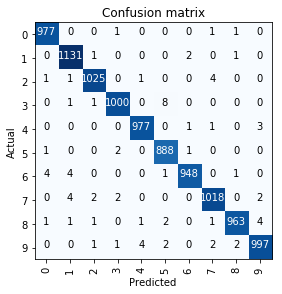

In [100]:
interp.plot_confusion_matrix()

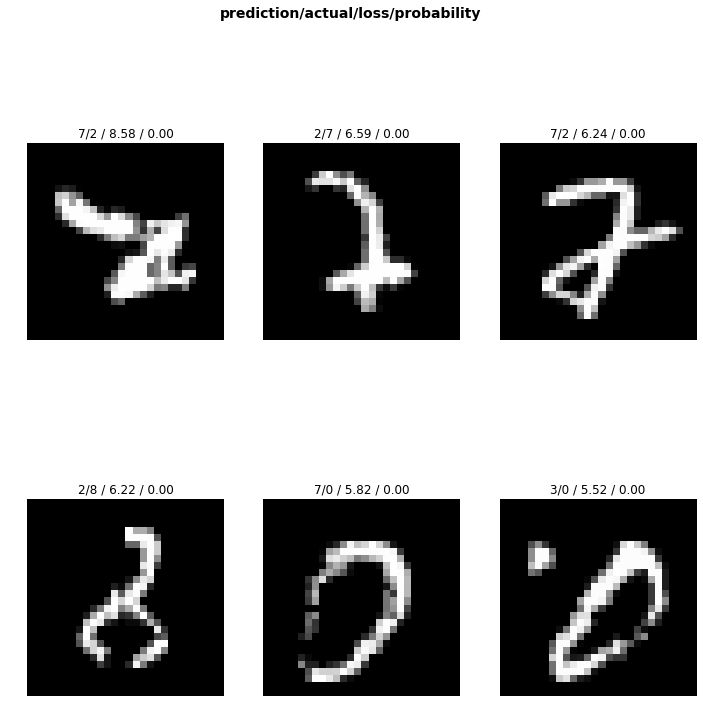

In [102]:
interp.plot_top_losses(6)

In [103]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel